In [10]:
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA

In [2]:
#eff = pd.read_csv('aggregated_efficientnet_median.csv', low_memory=False)
res = pd.read_csv('aggregated_resnet_median.csv', low_memory=False)
meta = pd.read_csv('../baseline/meta.csv')

In [27]:
e = eval.evaluation(eff)
eff = e.norm_agg()
name = 'eff'
exec(name + "_pre = eval.prec_mean(e.eval(" + name + ", operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(" + name + ", operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

6400 features were identified


In [3]:
feature_select_ops = [
    #"variance_threshold",
    "drop_outliers",
]
selected = feature_select(
    profiles=res,
    features=[f for f in res.columns if f.startswith("res")],
    operation=feature_select_ops,
    freq_cut=0.01,
    unique_cut=0.01,
    outlier_cutoff=1000,
)
selected.shape

(8733, 10258)

In [8]:
for c in res.columns:
    nans = res[c].isnull().sum()
    if nans:
        print(c, nans)



Metadata_Concentration 3239
Metadata_pert_iname 3239


In [4]:
e = eval.evaluation(selected, prefix = 'res')
res = e.norm_agg()
name = 'res'


10240 features were identified


/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ValueError: Divide by zero error, make sure low variance columns are removed

In [30]:
exec(name + "_pre = eval.prec_mean(e.eval(" + name + ", operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(" + name + ", operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [43]:
eff_pre.to_csv('../plot_storage/pre_tr_eff_pre.csv')
pd.DataFrame(eff_hit).to_csv('../plot_storage/pre_tr_eff_hit.csv')
eff_enr.to_csv('../plot_storage/pre_tr_eff_enr.csv')

res_pre.to_csv('../plot_storage/pre_tr_res_pre.csv')
pd.DataFrame(res_hit).to_csv('../plot_storage/pre_tr_res_hit.csv')
res_enr.to_csv('../plot_storage/pre_tr_res_enr.csv')

In [13]:
eff_pre = pd.read_csv('../plot_storage/pre_tr_eff_pre.csv')
eff_hit = pd.read_csv('../plot_storage/pre_tr_eff_hit.csv')
eff_enr = pd.read_csv('../plot_storage/pre_tr_eff_enr.csv')

res_pre= pd.read_csv('../plot_storage/pre_tr_res_pre.csv')
res_hit= pd.read_csv('../plot_storage/pre_tr_res_hit.csv')
res_enr= pd.read_csv('../plot_storage/pre_tr_res_enr.csv')

In [7]:
res_pre_r


0.06947699164937489

In [8]:
eff_pre_r


0.07220107296110034

In [11]:
base_pre = pd.read_csv('../plot_storage/baseline_calc_sph_pre.csv')
base_hit = pd.read_csv('../plot_storage/baseline_calc_sph_hit.csv')
base_enr = pd.read_csv('../plot_storage/baseline_calc_sph_enr.csv')

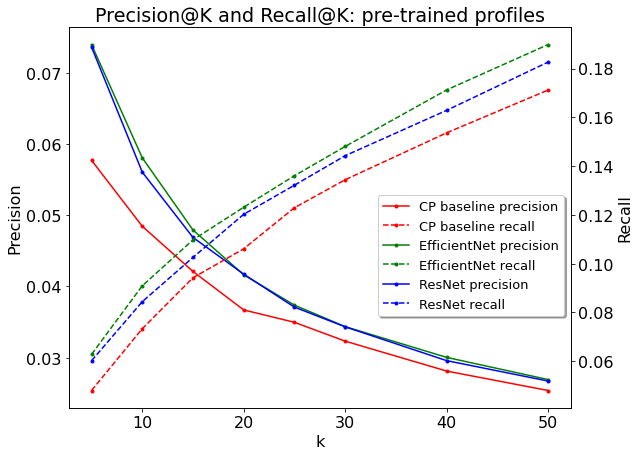

In [15]:
eval.plotting.prec_recall('Precision@K and Recall@K: pre-trained profiles', fontsize= 13, index1=base_pre, label_1="CP baseline", index2=eff_pre, label_2="EfficientNet", index3=res_pre, label_3="ResNet")\

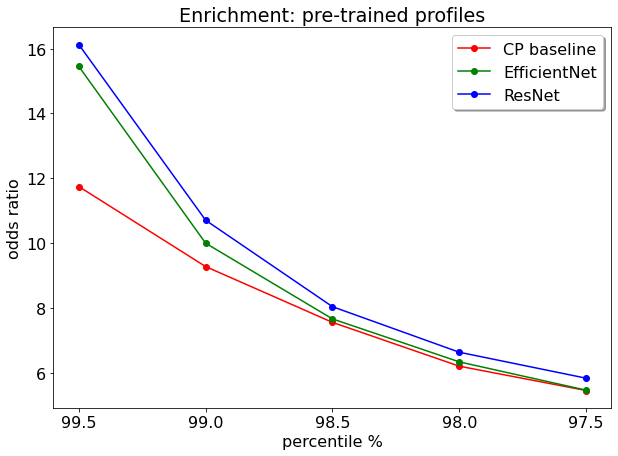

In [16]:
eval.plotting.enrichment('Enrichment: pre-trained profiles', index1=base_enr, label_1="CP baseline", index2=eff_enr, label_2="EfficientNet", index3=res_enr, label_3="ResNet")

In [ ]:
eval.plotting.hitk('Hit@K: pre-trained profiles', index1=base_hit["0"], label_1="CP baseline", index2=eff_hit["0"], label_3="EfficientNet", index3=res_hit["0"], label_2="ResNet")

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(eff_pre["k"], eff_pre["precision"], marker="o", color="green", label = 'eff')
plt.plot(eff_pre["k"], eff_pre["recall"], marker="o", color="g")
plt.plot(res_pre["k"], res_pre["precision"], marker="o", color="b", label = 'res')
plt.plot(res_pre["k"], res_pre["recall"], marker="o", color="b")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="r", label = 'base CP')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

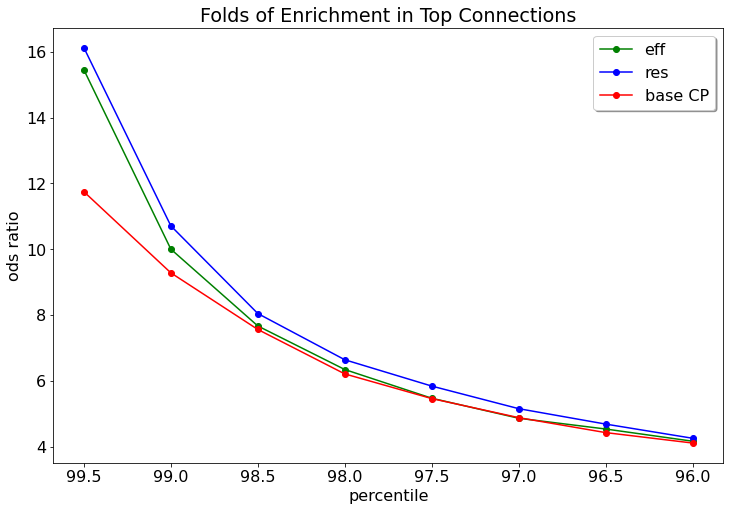

In [37]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*eff_enr["enrichment_percentile"], eff_enr["ods_ratio"], marker="o", color="g", label = 'eff')
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="b", label = 'res')
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="r", label = 'base CP')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

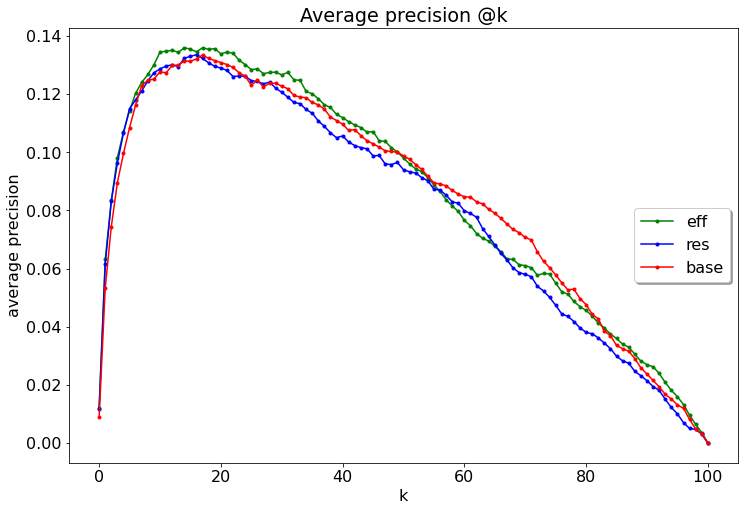

In [41]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(eff_hit, marker=".", color="g", label = 'eff')
plt.plot(res_hit, marker=".", color="b", label = 'res')
plt.plot(base_hit['0'], marker=".", color="r", label = 'base')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [9]:

eff_enr

NameError: name 'eff_enr' is not defined